<a href="https://colab.research.google.com/github/ikazreal21/machinelearning_sklearn_pytorch/blob/master/pytorchMNISTdset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch==1.8.0+cpu torchvision==0.9.0+cpu torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
# import torch

# x = torch.Tensor([5,3])
# y = torch.Tensor([3,3])

# # print(x*y)


# y = torch.rand([2,2])
# y.view([1,4])

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
class Neural(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.fullcon1 = nn.Linear(28*28,  64)
    self.fullcon2 = nn.Linear(64,  64)
    self.fullcon3 = nn.Linear(64,  64)
    self.fullcon4 = nn.Linear(64,  64)
    self.fullcon5 = nn.Linear(64,  10)

  # Can throw logic
  def forward(self, x):
    x = F.relu(self.fullcon1(x))
    x = F.relu(self.fullcon2(x))
    x = F.relu(self.fullcon3(x))
    x = F.relu(self.fullcon4(x))
    x = self.fullcon5(x)
    return F.log_softmax(x, dim=1)

net =  Neural()
# print(net)

In [ ]:
tr = torch.rand((28,28))
tr = tr.view(28*28)
output = net(tr)
output

tensor([-2.3152, -2.2955, -2.2627, -2.1794, -2.3158, -2.2870, -2.3371, -2.2612,
        -2.4417, -2.3509], grad_fn=<LogSoftmaxBackward>)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 3  

for epchs in range(epochs):
  for data in trainset:
    # data is a batch of featuresets and labels
    X, y = data 
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.1246, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)


In [ ]:
corr = 0
total = 0

with torch.no_grad():
  for data in trainset:
    # data is a batch of featuresets and labels
    X, y = data 
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        corr+=1
      total +=1
  
print("Accu: ", round(corr/total, 3))


Accu:  0.99


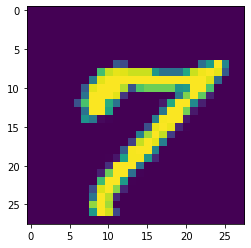

In [ ]:
plt.imshow(X[4].view(28, 28))
plt.show()

In [ ]:
print(torch.argmax(net(X[4].view(-1, 28*28))))

tensor(7)


In [ ]:
# for data in trainset:
#     print(data)
#     break
# x, y = data[0][2], data[1][0]
# plt.imshow(x.view([28,28]))
# plt.show()
# total = 0
# counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

# for data in trainset:
#   Xs, ys = data 
#   for y in ys:
#     counter[int(y)] += 1
#     total+=1

# print(counter)
# print(f"Total: {total}")

# for i in counter:
#   print(f"{i}: {counter[i]/total*100} ")